**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle
def get_distance(X, Y):
    x = (X ** 2).sum(axis=1)
    y = (Y ** 2).sum(axis=1)
    xy = X.dot(Y.T)
    dist = -2 * xy + y + x.reshape(-1, 1)
    
    return np.sqrt(np.where(dist < 0, 0, dist))

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, 
                             SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y):
        self.data = np.array(X)
        self.target = np.array(y)
        self.classes = np.unique(y)
        
    def mgetKNeighborsClasses(self, X, n_neighbors=None):
        if n_neighbors is None:
            n_neighbors = self.n_neighbors

        dist = get_distance(X, self.data)
        neighbor_args = np.argsort(dist, axis=1)[:, : n_neighbors]
        return self.target[neighbor_args]
    
    def predict(self, X):
        tdata = np.array(X)
        classes_neighbors = self.mgetKNeighborsClasses(X)
        prediction = np.zeros(X.shape[0], dtype=self.target.dtype)
        for i, cl in enumerate(classes_neighbors):
            unique, counts = np.unique(cl, return_counts=True)
            prediction[i] = unique[np.argmax(counts)]
        
        return prediction
    
    def predict_proba(self, X):
        classes_neighbors = self.mgetKNeighborsClasses(X)

        probs = []
        for cl in self.classes:
            probs.append(np.sum(cl == classes_neighbors, axis=1))

        return np.array(probs).T / self.n_neighbors
    
    def score(self, X, y):
        return np.average(self.predict(X) == y)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.18 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 520 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.31 ms


array([1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 9.3 ms


array([1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.69 ms


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 989 µs


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

1


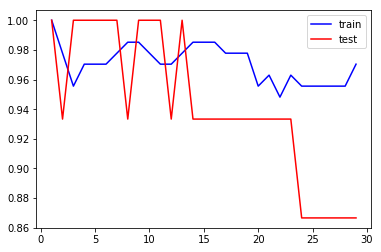

In [14]:
# Задание 3
neighbors_param = range(1, 30)
errors_train = []
errors_test = []
for k in neighbors_param:
    knn = MyKNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    errors_train.append(knn.score(X_train, y_train))
    errors_test.append(knn.score(X_test, y_test))

print(np.argmax(errors_test) + 1)
    
plt.plot(neighbors_param, errors_train, color='blue', label='train')
plt.plot(neighbors_param, errors_test, color='red', label='test')
plt.legend()

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 18.7 s, sys: 108 ms, total: 18.8 s
Wall time: 18.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 8 ms, sys: 8 ms, total: 16 ms
Wall time: 15.7 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 10min 2s, sys: 232 ms, total: 10min 2s
Wall time: 10min 2s


array([0., 1., 0., ..., 3., 3., 7.])

In [ ]:
%time my_clf.predict(X_test)

MemoryError: 

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn - визуализация статистических данных
# matplotlib - рисование графиков, отображение статистических данных
# train_test_split помогает корректно разбить данные на тестовые
# и тренировачные (не нарушая качественные соотношения)
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) объединяет
# набор функций в конвейер для одновременного (поочередного) применения
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# вычислет среднее значение и дисперсию данных для дальнейшего использования,
# стандартизует данные
# ClassifierMixin - класс для наследования метода score 
# KNeighborsMixin - нужен для наследования медота kneigbours
# SupervisedIntegerMixin - содержит метод fit, который и наследует